In [1]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [2]:
# statistics functions

import scikit_posthocs as scp

In [3]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import parameters into df1
df1 = xl.parse('Parameters',header=None)

# Import indoor data into df2
df2 = x2.parse('Indoor')

# Import offshore data ito df2
df3 = x2.parse('Offshore')

# Import outdoor data ito df4
df4 = x2.parse('Outdoor')

In [4]:
df2.head()

,Sample,Exp,Sleeve,Week,Stage,Timei,Timeh,Time,DW,mmi,...,Weighing,Trimming,Frequency,Amplitude,Duration,Flux,Sporulated,Comment,Day,Comment2
0,0.0,1,0,0.0,i,"2019,3,12,13,0","2019,3,12,13,0","2019,3,12,13,0",0.750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,0.7,1,0,0.0,f,"2019,3,12,13,0","2019,3,12,13,0","2019,3,19,13,0",0.753,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
2,1.0,1,1,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.144,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN
3,2.0,1,2,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.153,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN
4,3.0,1,3,1.0,i,"2019,3,19,13,0","2019,3,19,13,0","2019,3,19,13,0",0.159,NaN,...,NaN,NaN,1.0,1000.0,168.0,1000.0,No,NaN,NaN,NaN


In [6]:
# All NH4 results by treatment 
dNH4all = df2[(df2.Stage == 'f')&(np.isnan(df2.NH4)!= True)&(df2.Treatment != 'Acclimation')&(df2.Comment != 'Exclude')&(df2.Week <= 3)]
rp.summary_cont(dNH4all['NH4'].groupby(dNH4all['Treatment']))

,N,Mean,SD,SE,95% Conf.,Interval
Treatment,,,,,,
1000/1/168,19,18.7077,33.4653,7.6775,2.5779,34.8375
200/5/168,6,22.4349,86.5334,35.3271,-68.3764,113.2462
2000/1/168,3,47.0192,45.2825,26.1439,-65.4688,159.5071
500/2/168,42,22.8565,64.3139,9.9238,2.8149,42.8981
500/3/168,13,119.9416,183.7874,50.9735,8.8800,231.0033


In [7]:
# kruskal test - comparing DGR in different fluxes

sp.stats.kruskal(dNH4all[(dNH4all['Treatment'] == '1000/1/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '200/5/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '2000/1/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '500/2/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '500/3/168')]['NH4'])

# There is a significant difference between fluxes

KruskalResult(statistic=8.973745929765528, pvalue=0.06175906830645633)

In [8]:
# post - hoc multiple comparisons between fluxes - DGR

data = [dNH4all[(dNH4all['Treatment'] == '1000/1/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '200/5/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '2000/1/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '500/2/168')]['NH4'],
                dNH4all[(dNH4all['Treatment'] == '500/3/168')]['NH4']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')


,1,2,3,4,5
1,1.000000,1.0,1.000000,1.000000,0.509955
2,1.000000,1.0,1.000000,1.000000,1.000000
3,1.000000,1.0,1.000000,0.841208,1.000000
4,1.000000,1.0,0.841208,1.000000,0.095408
5,0.509955,1.0,1.000000,0.095408,1.000000


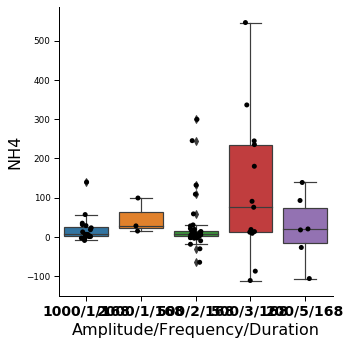

In [10]:
# NH4 in different treatments - all weeks together
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data,
fig = sns.catplot(x = 'Treatment', y = 'NH4', data = dNH4all,kind='box')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
fig.set_xticklabels(['1000/1/168', '200/5/168', '2000/1/168','500/2/168','500/3/168'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
fig = sns.stripplot(x = 'Treatment', y = 'NH4', data = dNH4all,color='k').set(xlabel='Amplitude/Frequency/Duration\n ', ylabel='NH4')